In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from tabulate import tabulate
from google.colab import files
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Autism_Prediction/dataset.csv')
print(df.head())

bootstrap_sample = df.sample(n=100, replace=True)
augmented_df = pd.concat([df, bootstrap_sample], ignore_index=True)

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         1   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
0         0         1  ...       f               ?       no     no   
1         0         0  ...       m               ?       no     no   
2         1         1  ...       m  White-European       no    yes   
3         0         0  ...       f               ?       no     no   
4         0         0  ...       m               ?       no     no   

   contry_of_res used_app_before     result     age_desc  relation Class/ASD  
0        Austria         

In [ ]:
df.shape

(800, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
df['ethnicity'].value_counts()

White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: ethnicity, dtype: int64

In [ ]:
df['relation'].value_counts()

Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: relation, dtype: int64

In [ ]:
df=df.replace({'yes':1,'no':0,'?':'Others','others':'Others'})
df['relation'].value_counts()

Self                        709
Others                       42
Parent                       29
Relative                     18
Health care professional      2
Name: relation, dtype: int64

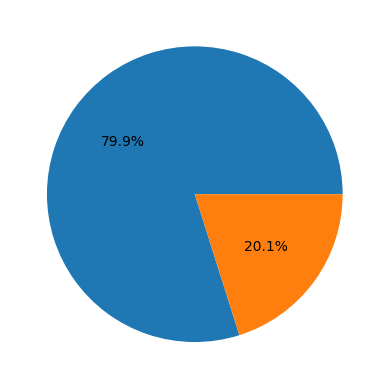

In [ ]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()

In [ ]:
ints = []
objects = []
floats = []

for col in df.columns:
    if df[col].dtype == int:
        ints.append(col)
    elif df[col].dtype == object:
        objects.append(col)
    else:
        floats.append(col)

In [ ]:
ints.remove('ID')
ints.remove('Class/ASD')

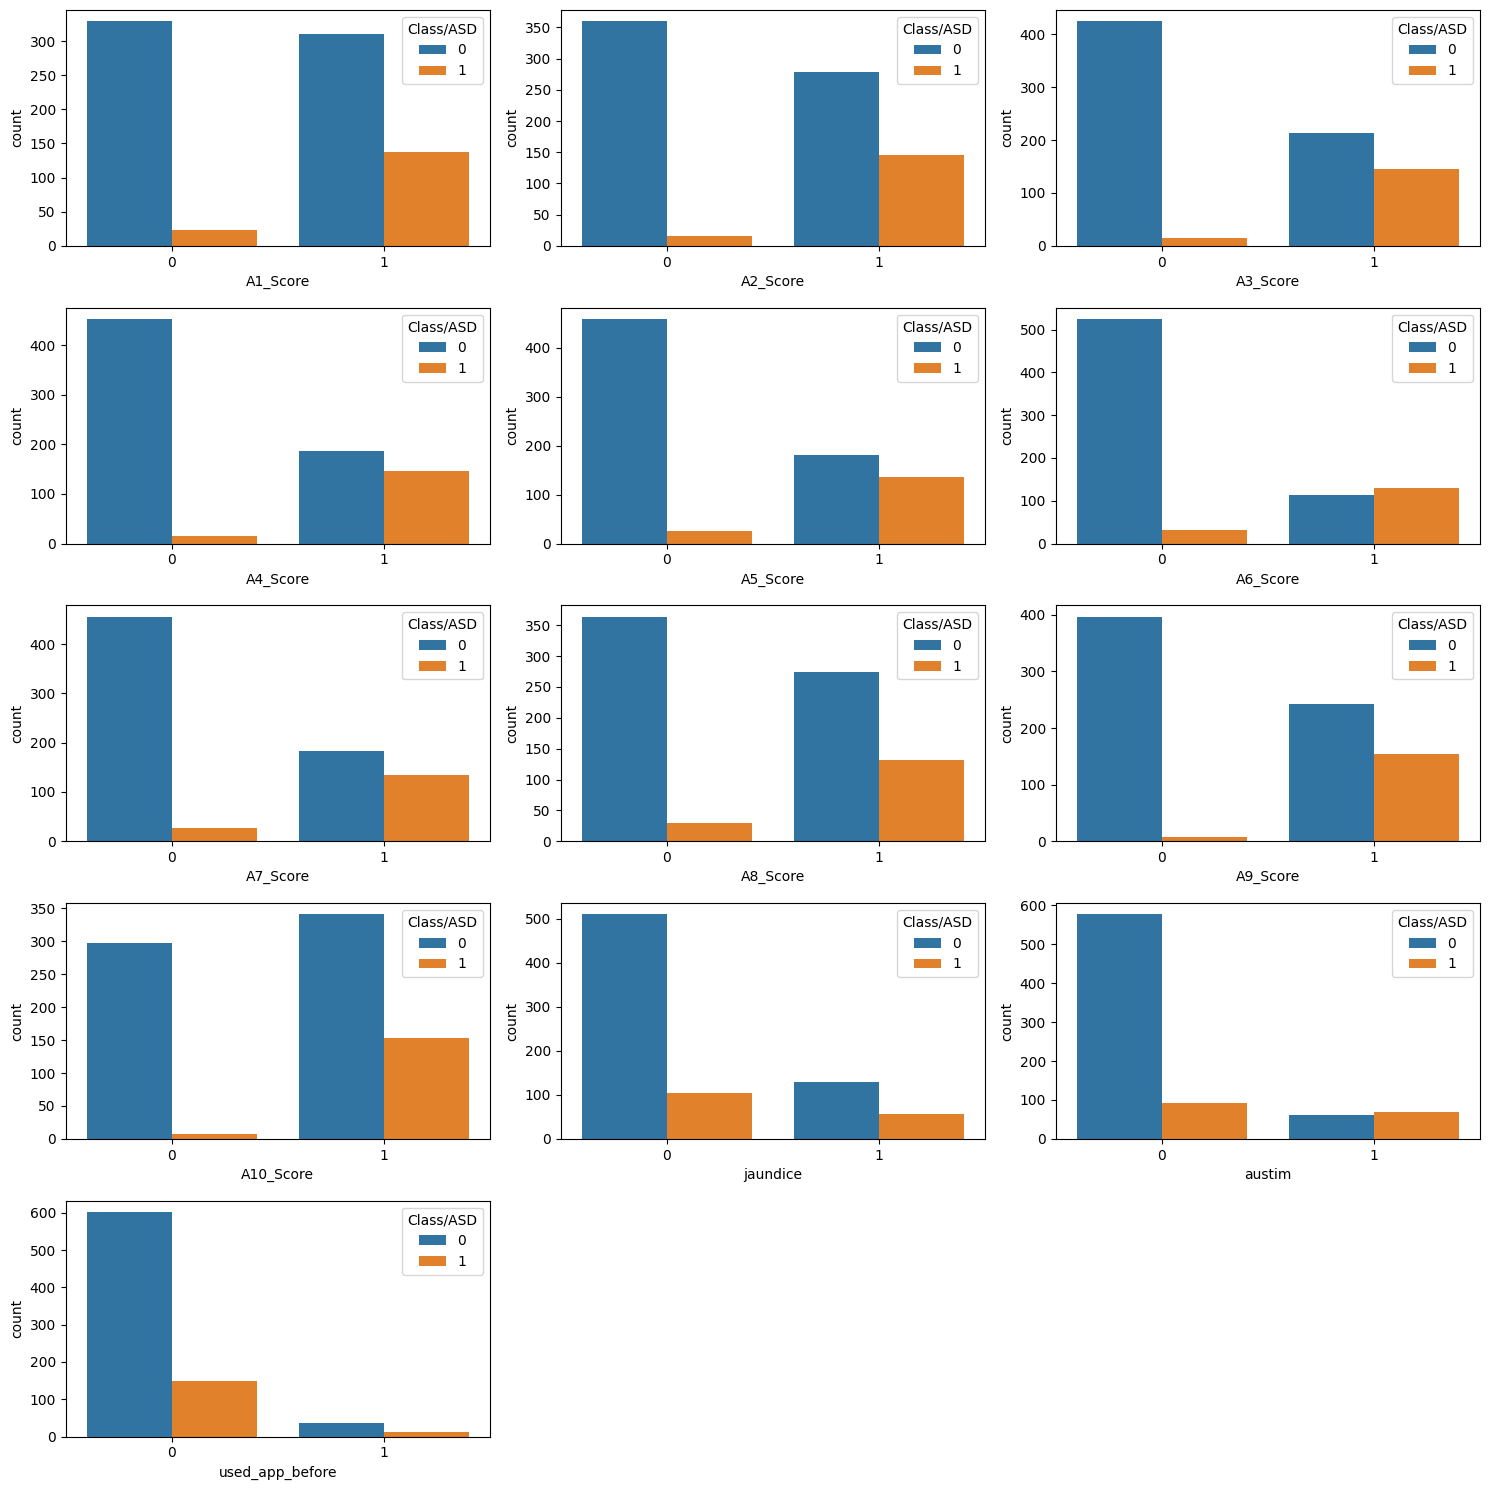

In [ ]:
plt.subplots(figsize=(15, 15))
rows = len(ints) // 3 + 1  # Calculate the number of rows dynamically
cols = min(len(ints), 3)  # Set the number of columns to maximum 3
for i, col in enumerate(ints):
    plt.subplot(rows, cols, i+1)
    sb.countplot(data=df, x=col, hue='Class/ASD')
plt.tight_layout()
plt.show()

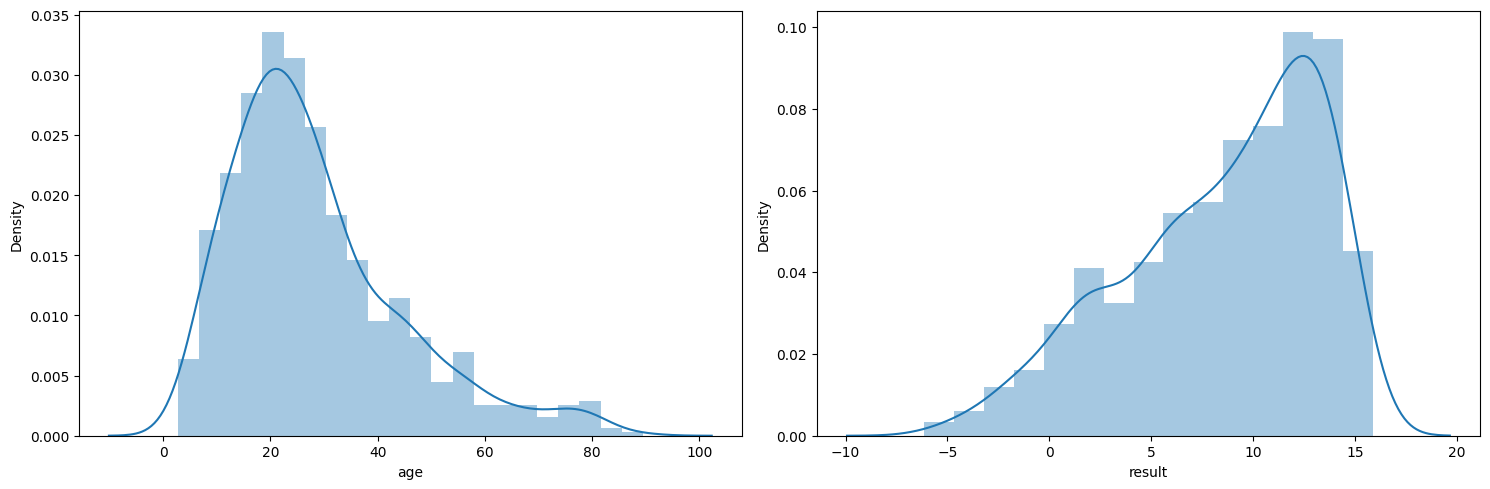

In [ ]:
#Detecting any skewness in the data:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

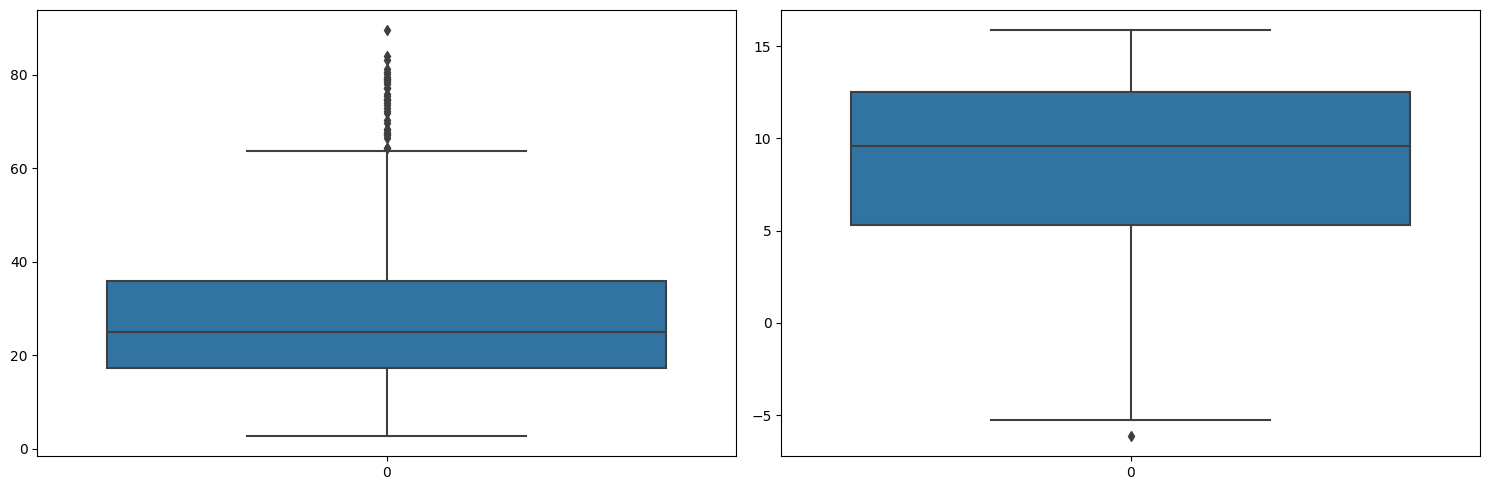

In [ ]:
#checking for outliers:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [ ]:
df=df[df['result']>-5]
df.shape

(798, 22)

In [ ]:
#calculating the sum of scores from A1 to A10
def add_feature(data):

  # Creating a column with all values zero
  data['sum_score'] = 0
  for col in data.loc[:,'A1_Score':'A10_Score'].columns:

    # Updating the 'sum_score' value with scores
    # from A1 to A10
    data['sum_score'] += data[col]

  # Creating a random data using the below three columns
  data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']

  return data

df = add_feature(df)

In [ ]:
df['age']=df['age'].apply(lambda x:np.log(x))

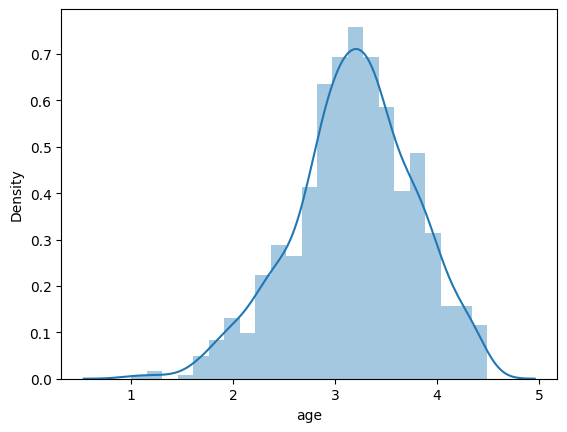

In [ ]:
sb.distplot(df['age'])
plt.show()

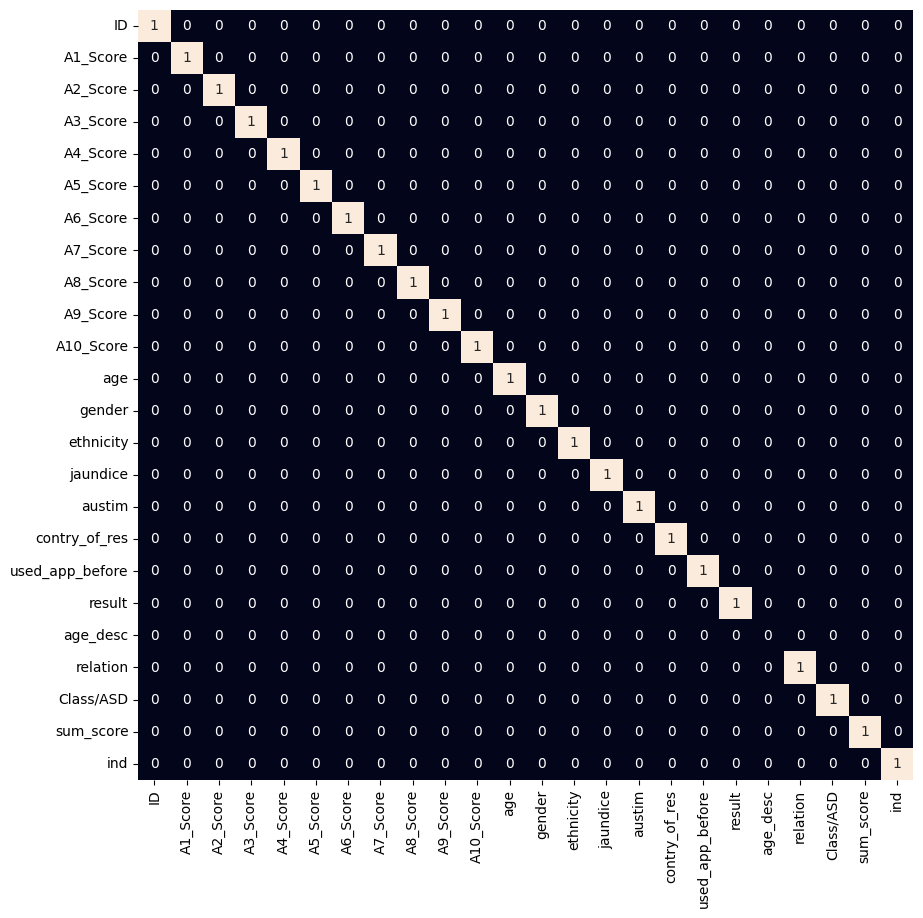

In [ ]:
#Checking for highly correlated features to remove as they don't help in detecting useful patterns in the data:
def encode_labels(data):
    for col in data.columns:

      # Here we will check if datatype
      # is object then we will encode it
      if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

    return data

df = encode_labels(df)

# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [ ]:
#removing unnecessary or harmful data and determining the labels and target:
removal=['ID','austim','used_app_before','age_desc']
features=df.drop(removal+['Class/ASD'],axis=1)
target=df['Class/ASD']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.3, random_state=10)

# Since the data was highly imbalanced we will balance it by  adding repitive rows of minority classes
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)


In [ ]:
#Normalizing the data for stable and fast training:
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train_resampled)

# Transform both the training and test data
X_train_resampled = scaler.transform(X_train_resampled)
X_test = scaler.transform(X_test)


In [ ]:
dt=DecisionTreeClassifier(max_depth=3,min_samples_leaf=10,random_state=1, criterion='entropy')
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=2)
gb=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)

In [ ]:
models = {"Gradient Boosting" :gb, "Decision Tree": dt, "Random Forest": rf,"SVM ":SVC(kernel='rbf'),"Naive Bayes": GaussianNB(),"KNN": KNeighborsClassifier()}
metrics = [
    {'name': 'accuracy', 'metric': make_scorer(accuracy_score)},
    {'name': 'precision', 'metric': make_scorer(precision_score)},
    {'name': 'recall', 'metric': make_scorer(recall_score)},
    {'name': 'f1_score', 'metric': make_scorer(f1_score)}
]

results_table = []
for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(X_train_resampled,Y_train_resampled) #Training the model

  #Making predictions
  Y_train_pred=model.predict(X_train_resampled)
  Y_test_pred=model.predict(X_test)

  #Testing set performance
  model_test_accuracy =accuracy_score(Y_test,Y_test_pred)
  model_test_f1=f1_score(Y_test,Y_test_pred,average='weighted')
  model_test_precision=precision_score(Y_test,Y_test_pred)
  model_test_recall=recall_score(Y_test,Y_test_pred)

  print(list(models.keys())[i])

  #Testing set results
  print('Model performance for testing set')
  print('-Accuracy: {:.4f}'.format(model_test_accuracy))
  print('-Precision: {:.4f}'.format(model_test_precision))
  print('-recall: {:.4f}'.format(model_test_recall))
  print('-f1_score: {:.4f}'.format(model_test_f1))
  print("$$$$$$$$$$$$$$$$$$$")
  print('\n')
  results_table.append([list(models.keys())[i], model_test_accuracy, model_test_precision, model_test_recall,
                          model_test_f1])

headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
table_str = tabulate(results_table, headers=headers, tablefmt="pipe")

# Print or save the table string
print(table_str)




Gradient Boosting
Model performance for testing set
-Accuracy: 0.8208
-Precision: 0.5797
-recall: 0.7407
-f1_score: 0.8280
$$$$$$$$$$$$$$$$$$$


Decision Tree
Model performance for testing set
-Accuracy: 0.8083
-Precision: 0.5513
-recall: 0.7963
-f1_score: 0.8191
$$$$$$$$$$$$$$$$$$$


Random Forest
Model performance for testing set
-Accuracy: 0.8417
-Precision: 0.6429
-recall: 0.6667
-f1_score: 0.8427
$$$$$$$$$$$$$$$$$$$


SVM 
Model performance for testing set
-Accuracy: 0.8167
-Precision: 0.5694
-recall: 0.7593
-f1_score: 0.8251
$$$$$$$$$$$$$$$$$$$


Naive Bayes
Model performance for testing set
-Accuracy: 0.8000
-Precision: 0.5357
-recall: 0.8333
-f1_score: 0.8130
$$$$$$$$$$$$$$$$$$$


KNN
Model performance for testing set
-Accuracy: 0.7708
-Precision: 0.4940
-recall: 0.7593
-f1_score: 0.7854
$$$$$$$$$$$$$$$$$$$


| Model             |   Accuracy |   Precision |   Recall |   F1 Score |
|:------------------|-----------:|------------:|---------:|-----------:|
| Gradient Boosting |   0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

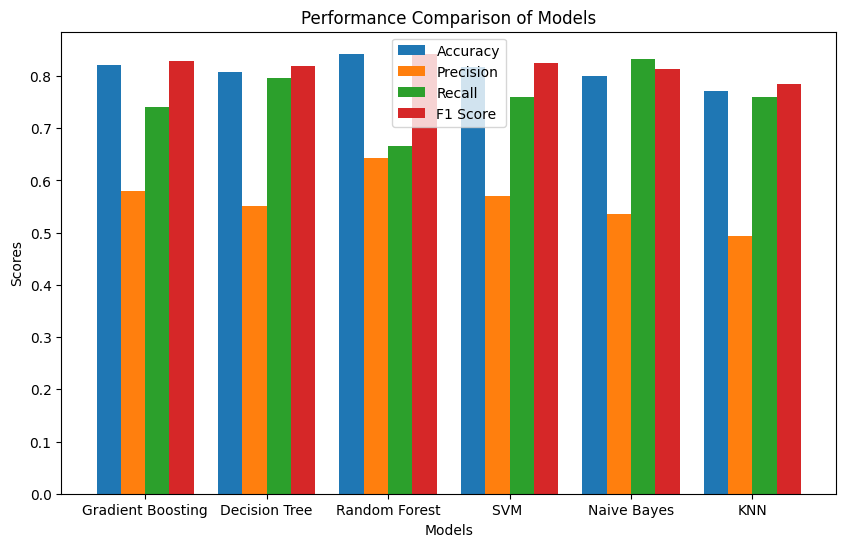

In [ ]:

# Extracting data for plotting
model_names = [result[0] for result in results_table]
accuracy_scores = [result[1] for result in results_table]
precision_scores = [result[2] for result in results_table]
recall_scores = [result[3] for result in results_table]
f1_scores = [result[4] for result in results_table]

# Creating a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(model_names))

bar1 = ax.bar(index, accuracy_scores, bar_width, label='Accuracy')
bar2 = ax.bar(index + bar_width, precision_scores, bar_width, label='Precision')
bar3 = ax.bar(index + 2 * bar_width, recall_scores, bar_width, label='Recall')
bar4 = ax.bar(index + 3 * bar_width, f1_scores, bar_width, label='F1 Score')

# Adding labels
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Models')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(model_names)
ax.legend()

# Display the chart
plt.savefig('performance_chart1.png')
files.download('performance_chart1.png')
plt.show()








In [ ]:
# Define the parameter grid for each model
param_grid_dt = {'max_depth': [None, 10, 20, 30, 40, 50]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto']}
param_grid_nb = {}  # No hyperparameters for Naive Bayes
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
param_grid_gb={'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]}

# Create a dictionary of models and their respective parameter grids
models_grid = {
    "SVM": (SVC(kernel='rbf'), param_grid_svm),
    "Gradient Boosting": (gb,param_grid_gb),
    "KNN": (KNeighborsClassifier(), param_grid_knn),
    "Random Forest": (rf, param_grid_rf),
    "Decision Tree": (dt, param_grid_dt),
    "Naive Bayes": (GaussianNB(), param_grid_nb)
}

metrics = [
    {'name': 'accuracy', 'metric': make_scorer(accuracy_score)},
    {'name': 'precision', 'metric': make_scorer(precision_score)},
    {'name': 'recall', 'metric': make_scorer(recall_score)},
    {'name': 'f1_score', 'metric': make_scorer(f1_score)}
]

#Initializing lists to store the results to represent in a chart
cv_model_names = [model_name for model_name, _ in models_grid.items()]
cv_model_names = []
cv_accuracy_scores = []
cv_precision_scores = []
cv_recall_scores = []
cv_f1_scores = []

# Perform Grid Search with Cross-Validation
for model_name, (model, param_grid) in models_grid.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_resampled, Y_train_resampled)

    # Get the best parameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    print(f"Best parameters for {model_name}: {best_params}")

    # Evaluate the best model on the test set
    Y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    test_precision = precision_score(Y_test, Y_test_pred)
    test_f1 = f1_score(Y_test, Y_test_pred)
    test_recall = recall_score(Y_test, Y_test_pred)

    print("Performance on the test set:")
    print('- Accuracy: {:.4f}'.format(test_accuracy))
    print('- Precision: {:.4f}'.format(test_precision))
    print('- Recall: {:.4f}'.format(test_recall))
    print('- F1 Score: {:.4f}'.format(test_f1))
    print("-------------------------------")
    print('\n')

    for metric in metrics:
      model,_=models_grid[model_name]
      scores = cross_val_score(model, X_train_resampled, Y_train_resampled, cv=10, scoring=metric['metric'])
      print('Cross-validation ' + metric['name'] + ' average scores for ' + model.__class__.__name__ + ':', scores.mean())
      print('----------------------------------------')



    print('\n ')

Best parameters for SVM: {'C': 10, 'gamma': 'auto'}
Performance on the test set:
- Accuracy: 0.8083
- Precision: 0.5625
- Recall: 0.6667
- F1 Score: 0.6102
-------------------------------


Cross-validation accuracy average scores for SVC: 0.9012820512820513
----------------------------------------
Cross-validation precision average scores for SVC: 0.8570058274783049
----------------------------------------
Cross-validation recall average scores for SVC: 0.9667149758454107
----------------------------------------
Cross-validation f1_score average scores for SVC: 0.9075495978060054
----------------------------------------

 
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
Performance on the test set:
- Accuracy: 0.8333
- Precision: 0.6061
- Recall: 0.7407
- F1 Score: 0.6667
-------------------------------


Cross-validation accuracy average scores for GradientBoostingClassifier: 0.9035286935286937
----------------------------------------

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

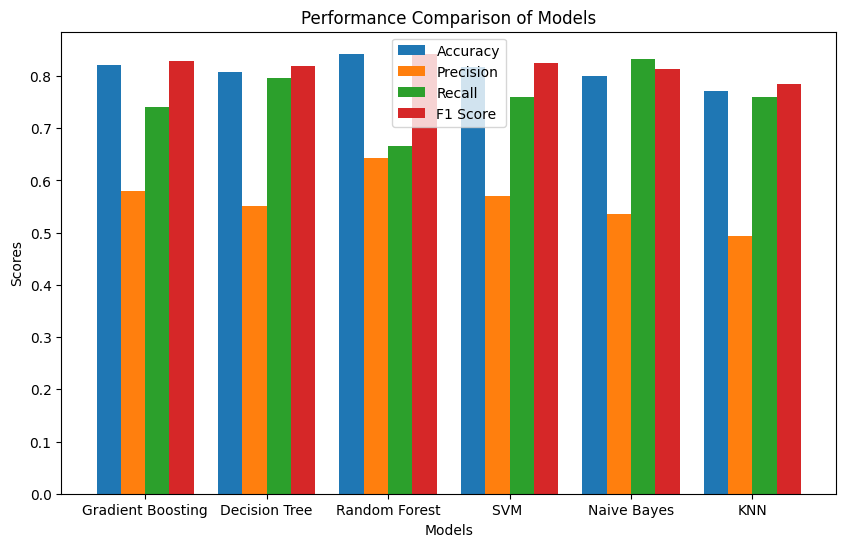

In [ ]:
# Extracting data for plotting
model_names = [result[0] for result in results_table]
accuracy_scores = [result[1] for result in results_table]
precision_scores = [result[2] for result in results_table]
recall_scores = [result[3] for result in results_table]
f1_scores = [result[4] for result in results_table]

# Creating a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(model_names))

bar1 = ax.bar(index, accuracy_scores, bar_width, label='Accuracy')
bar2 = ax.bar(index + bar_width, precision_scores, bar_width, label='Precision')
bar3 = ax.bar(index + 2 * bar_width, recall_scores, bar_width, label='Recall')
bar4 = ax.bar(index + 3 * bar_width, f1_scores, bar_width, label='F1 Score')

# Adding labels
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Models')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(model_names)
ax.legend()

# Display the chart
plt.savefig('performance_chart_grid_search1.png')
files.download('performance_chart_grid_search1.png')
plt.show()


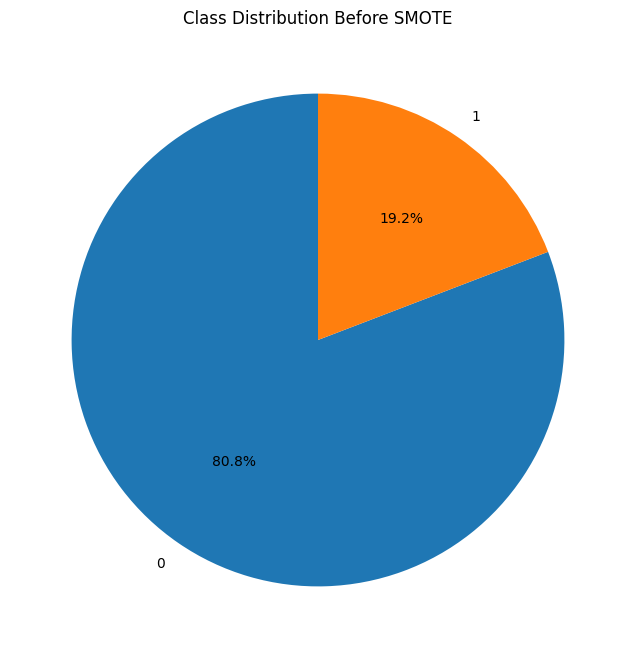

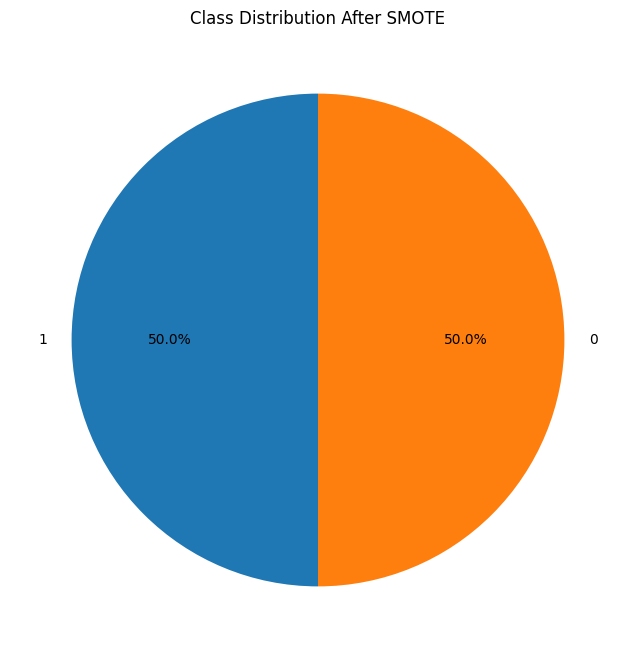

In [ ]:
# Before SMOTE
plt.figure(figsize=(8, 8))
plt.pie(Y_train.value_counts(), labels=Y_train.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution Before SMOTE')
plt.show()

# After SMOTE
plt.figure(figsize=(8, 8))
plt.pie(pd.Series(Y_train_resampled).value_counts(), labels=pd.Series(Y_train_resampled).value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution After SMOTE')
plt.show()